In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import chain


import numpy as np 

from fomlads.data.external import import_for_classification
from fomlads.data.external import normalisation
from fomlads.plot.evaluations import plot_roc
from fomlads.plot.evaluations import plot_train_test_errors
from fomlads.evaluate.eval_classification import confusion_matrix
from fomlads.evaluate.eval_classification import misclassification_error
from fomlads.evaluate.eval_logistic import test_parameter_logistic
from fomlads.evaluate.eval_classification import false_true_rates
from fomlads.evaluate.eval_logistic import cross_validation

from fomlads.model.classification import logistic_regression_fit
from fomlads.model.classification import logistic_regression_predict
from fomlads.model.classification import logistic_regression_prediction_probs
from fomlads.model.classification import split_train_test

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from fomlads.evaluate.eval_regression import root_mean_squared_error
from fomlads.evaluate.eval_classification import misclassification_error


from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from fomlads.model.regression import construct_feature_mapping_approx
from fomlads.model.basis_functions import quadratic_feature_mapping
from fomlads.model.classification import logistic_regression_fit
from fomlads.model.classification import logistic_regression_prediction_probs


In [70]:
def test_parameter_knn(X_train, y_train,X_test, y_test, n_neighbors=3, parameter_values= np.linspace(0, 2), parameter_name = 'Threshold'):
    """ 
    train_inputs
    train_targets
    test_inputs
    train_inputs


    return
    ----- 
    plot of test/train error according to the parameter tested
    """
    
    train_errors = []
    test_errors = []

    for reg_param in parameter_values:
        
        model = KNeighborsClassifier(n_neighbors=90)
        model.fit(x_train,X_test)

        #get preduction for both data sets
        prediction_probs_train = model.predict_proba(X_train)[:,1]
        prediction_probs_test = model.predict_proba(y_train)[:,1]        
        
        predicts_train = (prediction_probs_train > reg_param).astype(int)
        predicts_test = (prediction_probs_test > reg_param).astype(int)

        #Get the errors for both data sets
        train_error = misclassification_error(X_test, predicts_train)
        test_error =  misclassification_error(y_test, predicts_test)
        
        train_errors.append(train_error)
        test_errors.append(test_error)
        
    return train_errors, test_errors

In [71]:
#Read the file and clean the data
churn_data = pd.read_csv('Churn_Modelling.csv')
word_label = ['Geography', 'Gender']
removing = []

for column in word_label:
    if(churn_data[column].dtype == np.str or churn_data[column].dtype == np.object):
        for cat in churn_data[column].unique():
            churn_data[column+'_'+cat] = np.where(churn_data[column] == cat, 1, 0)
        removing.append(column)
churn_data = churn_data.drop(removing, axis = 1)

churn_data = churn_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis =1)

In [72]:
churn_data.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0,1,0


In [73]:
#Normalise the data for the logistic regression 
need_normalization = [ 'CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts','EstimatedSalary']
churn_data[need_normalization] = normalisation(churn_data[need_normalization])

#Define inputs and targets in the dataframe
inputs= churn_data[['CreditScore', 'Age', 'Tenure','Balance','NumOfProducts', 'EstimatedSalary']].to_numpy()
targets = churn_data['Exited'].to_numpy()


In [74]:
#Split the dataset into test and train sets
train_set, test_set = split_train_test(churn_data, test_ratio= 0.2)

#Define inputs and outputs for both sets:
X_train = train_set[['CreditScore', 'Age', 'Tenure','Balance','NumOfProducts', 'EstimatedSalary']].to_numpy()
X_test = train_set['Exited'].to_numpy()
y_train = test_set[['CreditScore', 'Age', 'Tenure','Balance','NumOfProducts', 'EstimatedSalary']].to_numpy()
y_test = test_set['Exited'].to_numpy()


In [75]:
reg_params = np.linspace(0, 2)
train_errors, test_errors = test_parameter_knn(X_train, y_train,X_test,y_test,10, reg_params)

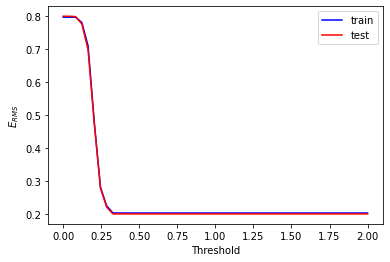

In [76]:
plot_train_test_errors('Threshold', reg_params, train_errors, test_errors)

plt.show()